In [1]:
!pip install jenkspy

/home/calum/anaconda3/lib/python3.8/site-packages/secretstorage/__init__.py:10: UserWarning: jeepney.integrate.blocking is deprecated: please use jeepney.io.blocking instead.
  from jeepney.integrate.blocking import DBusConnection, connect_and_authenticate


In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
import jenkspy
import numpy as np

In [4]:
from chessvision.aruco import *
from chessvision.label import *

In [5]:
game = Game("depth", 0)
len(game)

4

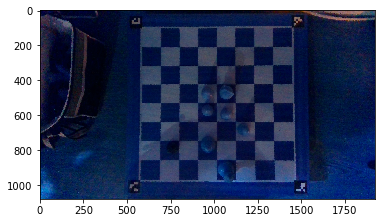

In [6]:
move = 0
moves = list(game.images)
color = moves[move]["color"]
plt.imshow(color, interpolation='nearest')

In [7]:
corners = find_corners(game.images)
corners

array([[1442.6426 ,   99.47834],
       [ 585.087  ,  103.50408],
       [1457.1119 ,  973.32935],
       [ 574.8794 ,  969.64844]], dtype=float32)

In [8]:
def board(img):
    return np.flip(get_board(img, corners), axis=1)

def heights(board):
    return [np.sum(square) for square in get_squares(board)]

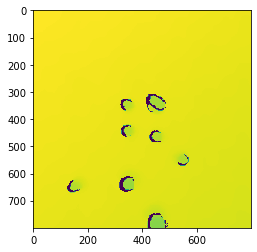

In [9]:
depth = moves[move]["depth"]
# depth = cv2.applyColorMap(cv2.convertScaleAbs(img, alpha=0.03), cv2.COLORMAP_JET)
plt.imshow(board(depth), interpolation='nearest')

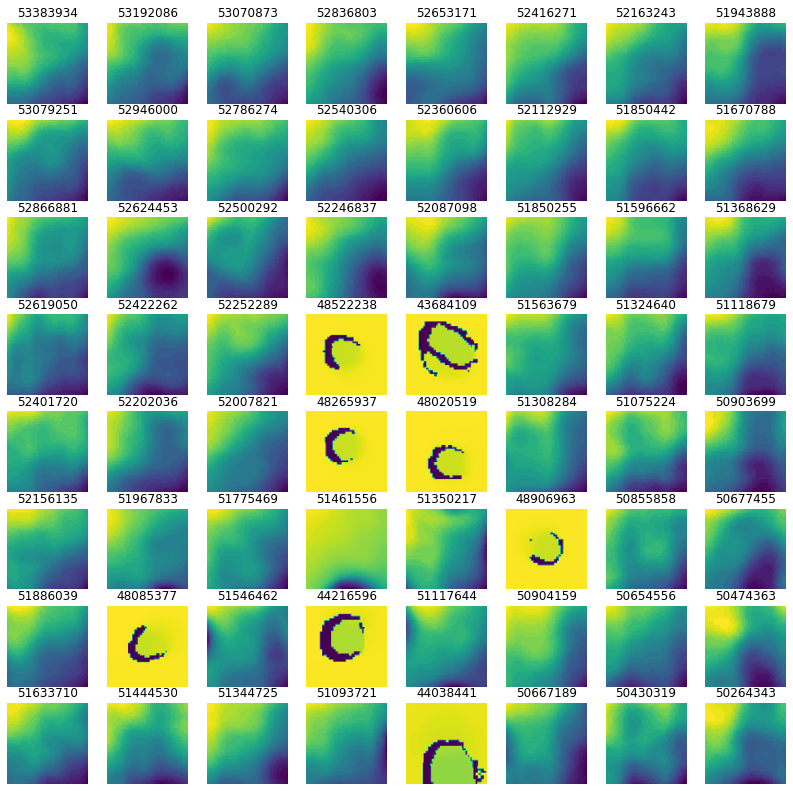

In [10]:
plt.figure(figsize=(14,14))
sums = []
for i, square in enumerate(get_squares(board(depth))):
    plt.subplot(8, 8, 64-i)
    height = np.sum(square)
    sums.append(height)
    plt.title(height)
    plt.imshow(square)
    plt.axis("off")

In [11]:
sums = list(itertools.chain.from_iterable(
    [heights(board(img["depth"])) for img in game.images]
))
len(sums)

384

In [12]:
jnb = jenkspy.JenksNaturalBreaks(2)
jnb.fit(sums)
jnb.inner_breaks_

[49424259.0]

In [13]:
bool(jnb.predict(48000000)), bool(jnb.predict(51000000))

(False, True)

In [14]:
get_occupied_squares(depth, corners)

[4, 9, 11, 21, 27, 28, 35, 36]

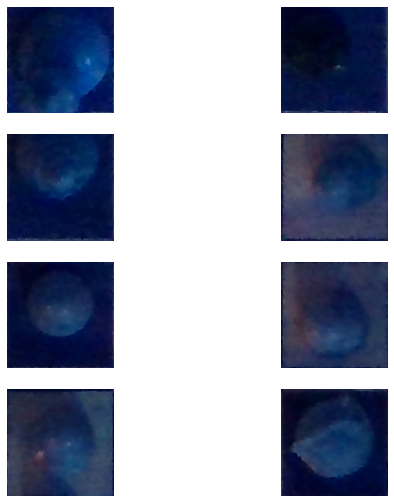

In [15]:
plt.figure(figsize=(9, 9))
for i, square in enumerate(get_occupied_squares(depth, corners)):
    plt.subplot(4, 2, i+1)
    plt.imshow(get_square(square, get_board(color, corners)))
    plt.axis("off")